In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date
import seaborn as sn
import matplotlib.pyplot as plt

In [4]:
# load data

mdro = pd.read_excel(r'C:\Users\User\VSCode\智抗菌平台報表_20220309.xlsx', sheet_name='MDROs', 
                        dtype={'病歷號碼':'str', '申請編號':'int', '就醫序號':'int'})
report = pd.read_excel(r'C:\Users\User\VSCode\智抗菌平台報表_20220309.xlsx', sheet_name='微生物報告', 
                        dtype={'病歷號碼':'str', '申請編號':'int', '就醫序號':'int'})
info = pd.read_excel(r'C:\Users\User\VSCode\智抗菌平台報表_20220309.xlsx', sheet_name='就醫資訊', 
                        dtype={'病歷號碼':'str', '就醫序號':'int'})
anti = pd.read_excel(r'C:\Users\User\VSCode\智抗菌平台報表_20220309.xlsx', sheet_name='抗生素使用', 
                        dtype={'病歷號碼':'str', '就醫序號':'int'})


In [5]:
mdro = mdro[['病歷號碼', 'time', '就醫序號','申請編號', '菌株', '預測值', '部位', 'sendTime']]
mdro.rename({'time':'openTime'}, axis=1, inplace=True)

In [6]:
report = report[['病歷號碼', 'bed', '就醫序號','申請編號', 'strain','部位', '抗藥性菌株', 'examTime','reportTime']]

In [7]:
cdss = pd.merge(report, mdro, how='left', on=['病歷號碼', '就醫序號','申請編號', '部位'])
cdss = cdss.drop_duplicates()
cdss['minTime'] = cdss.groupby(['病歷號碼', 'bed','就醫序號', '申請編號', '部位', '菌株', '預測值',  'sendTime'])['openTime'].transform('min')

In [14]:
info = info[['病歷號碼', '就醫序號', '性別', '生日', '來院日期', '離院日期', '天數', '門急住', '科別代碼', '科別']]
info.rename({'門急住':'bed'}, axis=1, inplace=True)

In [18]:
cdss_info = pd.merge(cdss, info, how='left', on=['病歷號碼', '就醫序號', 'bed'])
cdss_info = cdss_info.drop_duplicates()

In [21]:
CDSS = pd.merge(cdss_info, anti, how='left', on=['病歷號碼','就醫序號'])
CDSS = CDSS.drop_duplicates()

In [23]:
# CDSS.to_excel(r'C:\Users\User\VSCode\CDSS(2022).xlsx')

In [29]:
# evaluation

m = CDSS[CDSS.openTime==CDSS.minTime]

In [30]:
SA = m[(m['菌株'] == 'Staphylococcus aureus')|(m['菌株'] == 'Staphylococcus aureus(MRSA)')]
SA = SA.drop_duplicates() #766

In [31]:
C_pred = [(SA['菌株'] == 'Staphylococcus aureus'), (SA['菌株'] == 'Staphylococcus aureus(MRSA)')]
V_pred = [0, 1]

C_act = [(SA['抗藥性菌株']!=1), (SA['抗藥性菌株']==1)]
V_act = [0, 1]

SA['SA_pred'] = np.select(C_pred, V_pred)
SA['SA_actual'] = np.select(C_act, V_act)
SA['Group'] = 'Staphylococcus aureus'
SA.head()

,病歷號碼,bed,就醫序號,申請編號,strain,部位,抗藥性菌株,examTime,reportTime,openTime,...,每次量,途徑,頻率,使用天數,開始時間,截止時間,囑咐,SA_pred,SA_actual,Group
21278,0037886792,住院,231737615,393924901,[嗜氧] Staphylococcus aureus(MRSA) (Gram Positiv...,SCO,1.0,2021-12-30 13:02,2022-01-04 10:01,2022-01-03 08:50,...,1.0,IVD,STAT,1.0,2021-12-02 00:17,2021-12-02 00:17,NaN,1,1,Staphylococcus aureus
21279,0037886792,住院,231737615,393924901,[嗜氧] Staphylococcus aureus(MRSA) (Gram Positiv...,SCO,1.0,2021-12-30 13:02,2022-01-04 10:01,2022-01-03 08:50,...,1.0,IVD,STAT,1.0,2021-12-02 01:41,2021-12-02 01:41,釋液:NS;總量:50mL;時間:30分;流速:100mL/hr; Type B disse...,1,1,Staphylococcus aureus
21280,0037886792,住院,231737615,393924901,[嗜氧] Staphylococcus aureus(MRSA) (Gram Positiv...,SCO,1.0,2021-12-30 13:02,2022-01-04 10:01,2022-01-03 08:50,...,2.5,IVD,STAT,1.0,2021-12-06 17:19,2021-12-06 17:19,釋液:NS;總量:30mL;時間:30分;流速:60mL/hr;for fever,1,1,Staphylococcus aureus
21281,0037886792,住院,231737615,393924901,[嗜氧] Staphylococcus aureus(MRSA) (Gram Positiv...,SCO,1.0,2021-12-30 13:02,2022-01-04 10:01,2022-01-03 08:50,...,1.0,IVD,STAT,1.0,2021-12-10 10:25,2021-12-10 10:25,釋液:不稀釋;總量:150mL;時間:90分;流速:100mL/hr;supect pneu...,1,1,Staphylococcus aureus
21282,0037886792,住院,231737615,393924901,[嗜氧] Staphylococcus aureus(MRSA) (Gram Positiv...,SCO,1.0,2021-12-30 13:02,2022-01-04 10:01,2022-01-03 08:50,...,2.5,IVD,STAT,1.0,2021-12-21 12:17,2021-12-21 12:17,釋液:NS;總量:30mL;時間:30分;流速:60mL/hr;Type B aortic ...,1,1,Staphylococcus aureus


Staphylococcus aureus_Predicted    0    1
Staphylococcus aureus_Actual             
0                                162    0
1                                441  163


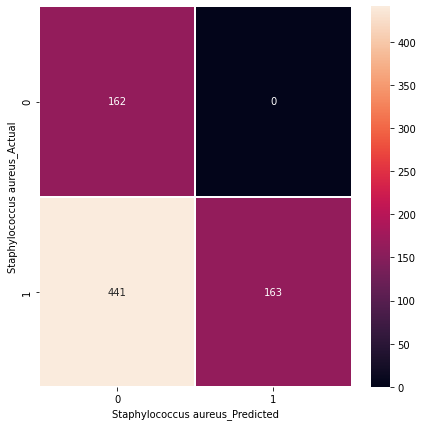

In [42]:
confusion_matrix_SA = pd.crosstab(SA['SA_actual'], SA['SA_pred'], rownames=['Staphylococcus aureus_Actual'], colnames=['Staphylococcus aureus_Predicted'])
print (confusion_matrix_SA)

plt.figure(figsize=(7,7))
sn.heatmap(confusion_matrix_SA, annot=True, fmt='d', linewidths=1.5)
plt.show()